In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
results = pd.read_csv(f"../experiments/scenario{0}_timo.csv")
dfi = results[["Travel_Time"]]
dfi.insert(0, 'Scenario', 'A')
dfi

,Scenario,Travel_Time
0,A,21
1,A,21
2,A,21
3,A,21
4,A,39
...,...,...
194872,A,107
194873,A,1054
194874,A,709
194875,A,234


In [3]:
results = {}
results_df = pd.DataFrame(columns=["Scenario", "Travel_Time"])

scenarios = ["A", "B", "C", "D"]

for i, scen in enumerate(scenarios):
    results[scen] = pd.read_csv(f"../experiments/scenario{i}_timo.csv")
    dfi = results[scen][["Travel_Time"]]
    dfi.insert(0, 'Scenario', scen)
    results_df = pd.concat([results_df, dfi])
results_df = results_df.reset_index(drop=True)

In [4]:
results_df.head(5)

,Scenario,Travel_Time
0,A,21
1,A,21
2,A,21
3,A,21
4,A,39


### Averages and standard deviations

In [5]:
#calculating 95% confidence intervals of the economic losses
confidence = 0.95

average = {}
low_bound = {}
high_bound = {}
interval_range = {}
economic_interval = {}

for i in scenarios:
    results_list = results[i]["Travel_Time"].tolist()
    average[i] = np.mean(results_list)
    low_bound[i], high_bound[i] = st.norm.interval(alpha=confidence, loc=average[i], scale=st.sem(results_list))
    interval_range[i] = high_bound[i] - low_bound[i]
    economic_interval[i] = interval_range[i] / average[i] * 100

    print(f'Average travel time (95% confidence interval) for scenario {i}: {average[i]:.3f} ({low_bound[i]:.3f}, {high_bound[i]:.3f}), economic interval: {economic_interval[i]:.3f}%')

df = pd.DataFrame({
    "Average (min)": average,
    "Low bound (min)": low_bound,
    "High bound (min)": high_bound,
    "Interval range (min)": interval_range,
    "Economic interval (%)": economic_interval})
df.to_csv("../results/travel_times.csv", index_label="Scenario")
df

Average travel time (95% confidence interval) for scenario A: 230.744 (229.566, 231.922), economic interval: 1.021%
Average travel time (95% confidence interval) for scenario B: 302.237 (300.719, 303.756), economic interval: 1.005%
Average travel time (95% confidence interval) for scenario C: 865.502 (861.404, 869.599), economic interval: 0.947%
Average travel time (95% confidence interval) for scenario D: 1256.685 (1251.178, 1262.192), economic interval: 0.876%


,Average (min),Low bound (min),High bound (min),Interval range (min),Economic interval (%)
A,230.743782,229.566017,231.921547,2.355529,1.020842
B,302.237064,300.718528,303.755599,3.037072,1.004864
C,865.501554,861.404326,869.598782,8.194457,0.946787
D,1256.684958,1251.177608,1262.192307,11.014699,0.876488


### Plots

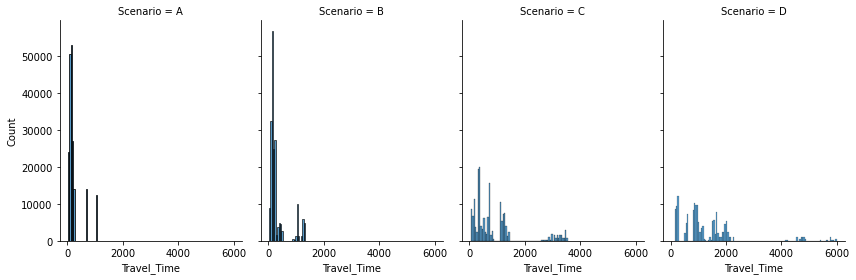

In [6]:
g = sns.FacetGrid(results_df, col="Scenario", height=4, aspect=0.75)
g.map_dataframe(sns.histplot, x="Travel_Time", binwidth=50)
plt.savefig("../images/histograms.svg")

In [7]:
pal = sns.color_palette("hls", 4)

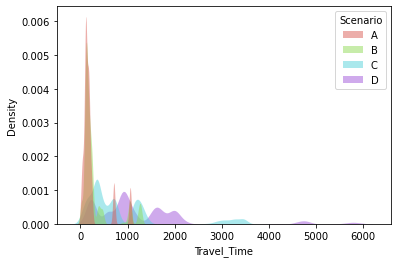

In [9]:
sns.kdeplot(data=results_df, x="Travel_Time", hue="Scenario", fill=True, common_norm=False, palette=pal, alpha=0.5, linewidth=0)
plt.savefig("../images/densities.svg")